In [1]:
# Thao tác dữ liệu
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Deep learning với Keras
from keras.layers import Input, Dense, Flatten, Concatenate, concatenate, Dropout, Lambda
from keras.models import Model
from keras.layers.embeddings import Embedding

# Progression bar
from tqdm import tqdm

# Diễn giải mô hình
import shap
shap.initjs()

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
df_coded = pd.read_csv("Deep_ILD_Origin.csv",sep=";")

df_display = pd.read_csv("Deep_ILD_Display.csv",sep=";")

In [3]:
df_coded.head()

,Sex,SSC_Type,NYHA,Smoking,Age,Hb,Height,Weight,FVC,FEV1,...,TLNO,TLCO,AV,DmNO,DmCO,Vcap,DLRatio,KCO,KNO,ILD
0,1,1,2,0,60.865753,14.6,177,84.0,-2.618976,-2.306295,...,-2.205204,-2.272672,-1.659373,-1.773319,-1.773319,-2.323771,0.637731,-2.398655,-2.279143,Positive
1,0,0,1,1,41.241096,11.6,168,82.0,-0.412330,-1.126847,...,-1.889399,-2.055930,-0.452314,-1.737807,-1.737807,-1.572084,1.168868,-3.024282,-2.825464,Negative
2,0,0,2,0,66.397260,9.2,161,38.0,-1.933384,-1.516154,...,-1.567726,-1.636388,-0.666726,-1.365406,-1.365406,-1.532319,0.397013,-2.081318,-2.015337,Negative
3,1,0,1,0,51.517808,14.8,185,83.0,1.973726,2.227276,...,-2.765598,-2.417166,-2.644079,-2.450795,-2.450795,-2.087513,-2.662008,-1.258552,-2.510862,Negative
4,0,0,2,0,33.717808,12.1,156,51.0,-1.678911,-1.603032,...,-2.004892,-2.374071,-0.857314,-1.471715,-1.471715,-2.291552,3.079664,-3.338904,-2.698732,Negative


In [4]:
df_display.head()

,Sex,SSC_Type,NYHA,Smoking,Age,Hb,Height,Weight,FVC,FEV1,...,TLNO,TLCO,AV,DmNO,DmCO,Vcap,DLRatio,KCO,KNO,ILD
0,M,D,2,No,60.865753,14.6,177,84.0,-2.618976,-2.306295,...,-2.205204,-2.272672,-1.659373,-1.773319,-1.773319,-2.323771,0.637731,-2.398655,-2.279143,Positive
1,F,L,1,Yes,41.241096,11.6,168,82.0,-0.412330,-1.126847,...,-1.889399,-2.055930,-0.452314,-1.737807,-1.737807,-1.572084,1.168868,-3.024282,-2.825464,Negative
2,F,L,2,No,66.397260,9.2,161,38.0,-1.933384,-1.516154,...,-1.567726,-1.636388,-0.666726,-1.365406,-1.365406,-1.532319,0.397013,-2.081318,-2.015337,Negative
3,M,L,1,No,51.517808,14.8,185,83.0,1.973726,2.227276,...,-2.765598,-2.417166,-2.644079,-2.450795,-2.450795,-2.087513,-2.662008,-1.258552,-2.510862,Negative
4,F,L,2,No,33.717808,12.1,156,51.0,-1.678911,-1.603032,...,-2.004892,-2.374071,-0.857314,-1.471715,-1.471715,-2.291552,3.079664,-3.338904,-2.698732,Negative


In [5]:
df_coded.dtypes

Sex           int64
SSC_Type      int64
NYHA          int64
Smoking       int64
Age         float64
Hb          float64
Height        int64
Weight      float64
FVC         float64
FEV1        float64
Tiffneau    float64
TLC         float64
RV          float64
TLNO        float64
TLCO        float64
AV          float64
DmNO        float64
DmCO        float64
Vcap        float64
DLRatio     float64
KCO         float64
KNO         float64
ILD          object
dtype: object

In [6]:
# All categorical features transformed to integer 8 bits

df_coded['Sex'] = df_coded['Sex'].astype('int8')
df_coded['SSC_Type'] = df_coded['SSC_Type'].astype('int8')
df_coded['NYHA'] = df_coded['NYHA'].astype('int8')
df_coded['Smoking'] = df_coded['Smoking'].astype('int8')

# All numerical features transformed to float numbers 32 bits

df_coded['Age'] = df_coded['Age'].astype('float32')
df_coded['Hb'] = df_coded['Hb'].astype('float32')
df_coded['Height'] = df_coded['Height'].astype('float32')
df_coded['Weight'] = df_coded['Weight'].astype('float32')
df_coded['FVC'] = df_coded['FVC'].astype('float32')
df_coded['FEV1'] = df_coded['FEV1'].astype('float32')
df_coded['Tiffneau'] = df_coded['Tiffneau'].astype('float32')
df_coded['TLC'] = df_coded['TLC'].astype('float32')
df_coded['RV'] = df_coded['RV'].astype('float32')
df_coded['TLNO'] = df_coded['TLNO'].astype('float32')
df_coded['TLCO'] = df_coded['TLCO'].astype('float32')
df_coded['AV'] = df_coded['AV'].astype('float32')
df_coded['DmNO'] = df_coded['DmNO'].astype('float32')
df_coded['DmCO'] = df_coded['DmCO'].astype('float32')
df_coded['Vcap'] = df_coded['Vcap'].astype('float32')
df_coded['DLRatio'] = df_coded['DLRatio'].astype('float32')
df_coded['KCO'] = df_coded['KCO'].astype('float32')
df_coded['KNO'] = df_coded['KNO'].astype('float32')

In [7]:
df_coded.dtypes

Sex            int8
SSC_Type       int8
NYHA           int8
Smoking        int8
Age         float32
Hb          float32
Height      float32
Weight      float32
FVC         float32
FEV1        float32
Tiffneau    float32
TLC         float32
RV          float32
TLNO        float32
TLCO        float32
AV          float32
DmNO        float32
DmCO        float32
Vcap        float32
DLRatio     float32
KCO         float32
KNO         float32
ILD          object
dtype: object

In [8]:
X,y = df_coded.drop(['ILD'], axis=1), df_coded['ILD'].values

In [9]:
X_disp,y_disp = df_display.drop(['ILD'], axis=1), df_display['ILD'].values

In [10]:
X['Age'] -= X['Age'].mean()
X['Age'] /= X['Age'].std()

X['Hb'] -= X['Hb'].mean()
X['Hb'] /= X['Hb'].std()

X['Height'] -= X['Height'].mean()
X['Height'] /= X['Height'].std()

X['Weight'] -= X['Weight'].mean()
X['Weight'] /= X['Weight'].std()

In [12]:
X.head()

,Sex,SSC_Type,NYHA,Smoking,Age,Hb,Height,Weight,FVC,FEV1,...,RV,TLNO,TLCO,AV,DmNO,DmCO,Vcap,DLRatio,KCO,KNO
0,1,1,2,0,0.432186,1.201431,1.658883,1.523531,-2.618977,-2.306295,...,-2.626463,-2.205204,-2.272671,-1.659373,-1.773319,-1.773319,-2.323771,0.637731,-2.398655,-2.279143
1,0,0,1,1,-0.969475,-1.017688,0.559674,1.374846,-0.412330,-1.126847,...,0.809143,-1.889399,-2.055929,-0.452314,-1.737807,-1.737807,-1.572084,1.168868,-3.024282,-2.825464
2,0,0,2,0,0.827266,-2.792984,-0.295267,-1.896233,-1.933384,-1.516154,...,0.812159,-1.567726,-1.636388,-0.666726,-1.365406,-1.365406,-1.532319,0.397013,-2.081318,-2.015337
3,1,0,1,0,-0.235477,1.349372,2.635958,1.449188,1.973726,2.227276,...,-0.087981,-2.765598,-2.417166,-2.644079,-2.450795,-2.450795,-2.087513,-2.662008,-1.258552,-2.510862
4,0,0,2,0,-1.506815,-0.647835,-0.905939,-0.929778,-1.678911,-1.603032,...,-0.607873,-2.004892,-2.374071,-0.857314,-1.471715,-1.471715,-2.291552,3.079664,-3.338904,-2.698732


In [13]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=123)

X_disp_train, X_disp_test, y_disp_train, y_disp_test = train_test_split(X_disp,y_disp, test_size=0.2, random_state=123)

In [15]:
X_train.shape, X_valid.shape

((300, 22), (76, 22))

In [16]:
from sklearn.preprocessing import LabelEncoder

encoder=LabelEncoder().fit(y_train)

encoded_y_train=encoder.transform(y_train)
encoded_y_valid=encoder.transform(y_valid)

In [17]:
encoded_y_train[0:5], encoded_y_valid[0:5]

(array([1, 1, 0, 0, 1]), array([1, 1, 1, 1, 0]))

In [19]:
dtypes = list(zip(X.columns, map(str, X.dtypes)))

In [24]:
# Dựng một mô hình keras kiểu "function"

input_els = []
encoded_els = []

# Đầu vào = 5 Lớp Embedding + flatten
for k,dtype in dtypes:
    input_els.append(Input(shape=(1,))) 
    if dtype == "int8":
        e = Flatten()(Embedding(X_train[k].max()+1, 1)(input_els[-1])) # embedding cho feature định tính (int8)
    else:
        e = input_els[-1] # riêng cho feature định lượng (float32)
    encoded_els.append(e)

encoded_els = concatenate(encoded_els)  # Nhập features định tính và định lượng vào cùng tensor

hidden1 = Dense(128, kernel_initializer='normal', activation="relu")(encoded_els) # Lớp ẩn thứ 1: 128 neuron
droplayer1 = Dropout(0.2)(hidden1) # Lớp dropout thứ 1 
hidden2 = Dense(64, kernel_initializer='normal', activation="relu")(droplayer1) # lớp ẩn thứ 2: 64 neuron
droplayer2 = Dropout(0.2)(hidden2) # Lớp dropout thứ 2
outputlayer = Dense(1, kernel_initializer='normal', activation='sigmoid')(droplayer2) # Lớp sau cùng, xuất kết quả

classifier = Model(inputs=input_els, outputs=[outputlayer])

classifier.compile(optimizer="adam", loss='binary_crossentropy', metrics=['accuracy'])

classifier.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_45 (InputLayer)           (None, 1)            0                                            
__________________________________________________________________________________________________
input_46 (InputLayer)           (None, 1)            0                                            
__________________________________________________________________________________________________
input_47 (InputLayer)           (None, 1)            0                                            
__________________________________________________________________________________________________
input_48 (InputLayer)           (None, 1)            0                                            
__________________________________________________________________________________________________
embedding_

                                                                 input_64[0][0]                   
                                                                 input_65[0][0]                   
                                                                 input_66[0][0]                   
__________________________________________________________________________________________________
dense_7 (Dense)                 (None, 128)          2944        concatenate_3[0][0]              
__________________________________________________________________________________________________
dropout_5 (Dropout)             (None, 128)          0           dense_7[0][0]                    
__________________________________________________________________________________________________
dense_8 (Dense)                 (None, 64)           8256        dropout_5[0][0]                  
__________________________________________________________________________________________________
dropout_6 

In [25]:
classifier.fit(
    [X_train[k].values for k,t in dtypes],
    encoded_y_train,
    epochs=35,
    batch_size=32,
    shuffle=True,
    validation_data=([X_valid[k].values for k,t in dtypes], encoded_y_valid) 
)

Train on 300 samples, validate on 76 samples
Epoch 1/35
300/300 [==============================] - ETA: 4s - loss: 0.6912 - acc: 0.500 - ETA: 0s - loss: 0.6765 - acc: 0.597 - 1s 2ms/step - loss: 0.6752 - acc: 0.6033 - val_loss: 0.6571 - val_acc: 0.5921
Epoch 2/35
300/300 [==============================] - ETA: 0s - loss: 0.6330 - acc: 0.750 - ETA: 0s - loss: 0.6448 - acc: 0.645 - 0s 267us/step - loss: 0.6463 - acc: 0.6367 - val_loss: 0.6197 - val_acc: 0.6447
Epoch 3/35
300/300 [==============================] - ETA: 0s - loss: 0.6119 - acc: 0.718 - ETA: 0s - loss: 0.6099 - acc: 0.664 - 0s 283us/step - loss: 0.6172 - acc: 0.6533 - val_loss: 0.5715 - val_acc: 0.7237
Epoch 4/35
300/300 [==============================] - ETA: 0s - loss: 0.6823 - acc: 0.593 - 0s 233us/step - loss: 0.5788 - acc: 0.7333 - val_loss: 0.5331 - val_acc: 0.7632
Epoch 5/35
300/300 [==============================] - ETA: 0s - loss: 0.5980 - acc: 0.625 - 0s 228us/step - loss: 0.5613 - acc: 0.7333 - val_loss: 0.5107 -

In [26]:
def pred_func(X):
    return classifier.predict([X[:,i] for i in range(X.shape[1])]).flatten()

In [27]:
explainer = shap.KernelExplainer(pred_func, X.iloc[:len(X),:])

Using 376 background data samples could cause slower run times. Consider using shap.kmeans(data, K) to summarize the background as K weighted samples.


In [30]:
# Case N°1 trong testset
i=0

print("Case N°", i+1)
print("Chẩn đoán =", y_disp_test[i])
print("Giải thích mô hình :")
shap_values = explainer.shap_values(X_valid.iloc[i,:], nsamples=500)
shap.force_plot(explainer.expected_value, shap_values, X_disp_test.iloc[i,:])

Case N° 1
Chẩn đoán = Positive
Giải thích mô hình :


In [31]:
i=1

print("Case N°", i+1)
print("Chẩn đoán =", y_disp_test[i])
print("Giải thích mô hình :")
shap_values = explainer.shap_values(X_valid.iloc[i,:], nsamples=500)
shap.force_plot(explainer.expected_value, shap_values, X_disp_test.iloc[i,:])

Case N° 2
Chẩn đoán = Positive
Giải thích mô hình :


In [32]:
i=2

print("Case N°", i+1)
print("Chẩn đoán =", y_disp_test[i])
print("Giải thích mô hình :")
shap_values = explainer.shap_values(X_valid.iloc[i,:], nsamples=500)
shap.force_plot(explainer.expected_value, shap_values, X_disp_test.iloc[i,:])

Case N° 3
Chẩn đoán = Positive
Giải thích mô hình :


In [33]:
i=3

print("Case N°", i+1)
print("Chẩn đoán =", y_disp_test[i])
print("Giải thích mô hình :")
shap_values = explainer.shap_values(X_valid.iloc[i,:], nsamples=500)
shap.force_plot(explainer.expected_value, shap_values, X_disp_test.iloc[i,:])

Case N° 4
Chẩn đoán = Positive
Giải thích mô hình :


In [34]:
i=4

print("Case N°", i+1)
print("Chẩn đoán =", y_disp_test[i])
print("Giải thích mô hình :")
shap_values = explainer.shap_values(X_valid.iloc[i,:], nsamples=500)
shap.force_plot(explainer.expected_value, shap_values, X_disp_test.iloc[i,:])

Case N° 5
Chẩn đoán = Negative
Giải thích mô hình :


In [35]:
i=5

print("Case N°", i+1)
print("Chẩn đoán =", y_disp_test[i])
print("Giải thích mô hình :")
shap_values = explainer.shap_values(X_valid.iloc[i,:], nsamples=500)
shap.force_plot(explainer.expected_value, shap_values, X_disp_test.iloc[i,:])

Case N° 6
Chẩn đoán = Positive
Giải thích mô hình :


In [36]:
i=6

print("Case N°", i+1)
print("Chẩn đoán =", y_disp_test[i])
print("Giải thích mô hình :")
shap_values = explainer.shap_values(X_valid.iloc[i,:], nsamples=500)
shap.force_plot(explainer.expected_value, shap_values, X_disp_test.iloc[i,:])

Case N° 7
Chẩn đoán = Positive
Giải thích mô hình :


In [37]:
i=7

print("Case N°", i+1)
print("Chẩn đoán =", y_disp_test[i])
print("Giải thích mô hình :")
shap_values = explainer.shap_values(X_valid.iloc[i,:], nsamples=500)
shap.force_plot(explainer.expected_value, shap_values, X_disp_test.iloc[i,:])

Case N° 8
Chẩn đoán = Positive
Giải thích mô hình :


In [38]:
i=8

print("Case N°", i+1)
print("Chẩn đoán =", y_disp_test[i])
print("Giải thích mô hình :")
shap_values = explainer.shap_values(X_valid.iloc[i,:], nsamples=500)
shap.force_plot(explainer.expected_value, shap_values, X_disp_test.iloc[i,:])

Case N° 9
Chẩn đoán = Negative
Giải thích mô hình :


In [39]:
i=9

print("Case N°", i+1)
print("Chẩn đoán =", y_disp_test[i])
print("Giải thích mô hình :")
shap_values = explainer.shap_values(X_valid.iloc[i,:], nsamples=500)
shap.force_plot(explainer.expected_value, shap_values, X_disp_test.iloc[i,:])

Case N° 10
Chẩn đoán = Negative
Giải thích mô hình :


In [40]:
i=10

print("Case N°", i+1)
print("Chẩn đoán =", y_disp_test[i])
print("Giải thích mô hình :")
shap_values = explainer.shap_values(X_valid.iloc[i,:], nsamples=500)
shap.force_plot(explainer.expected_value, shap_values, X_disp_test.iloc[i,:])

Case N° 11
Chẩn đoán = Negative
Giải thích mô hình :


In [41]:
i=11

print("Case N°", i+1)
print("Chẩn đoán =", y_disp_test[i])
print("Giải thích mô hình :")
shap_values = explainer.shap_values(X_valid.iloc[i,:], nsamples=500)
shap.force_plot(explainer.expected_value, shap_values, X_disp_test.iloc[i,:])

Case N° 12
Chẩn đoán = Positive
Giải thích mô hình :


In [42]:
i=12

print("Case N°", i+1)
print("Chẩn đoán =", y_disp_test[i])
print("Giải thích mô hình :")
shap_values = explainer.shap_values(X_valid.iloc[i,:], nsamples=500)
shap.force_plot(explainer.expected_value, shap_values, X_disp_test.iloc[i,:])

Case N° 13
Chẩn đoán = Positive
Giải thích mô hình :


In [43]:
i=13

print("Case N°", i+1)
print("Chẩn đoán =", y_disp_test[i])
print("Giải thích mô hình :")
shap_values = explainer.shap_values(X_valid.iloc[i,:], nsamples=500)
shap.force_plot(explainer.expected_value, shap_values, X_disp_test.iloc[i,:])

Case N° 14
Chẩn đoán = Positive
Giải thích mô hình :


In [44]:
i=14

print("Case N°", i+1)
print("Chẩn đoán =", y_disp_test[i])
print("Giải thích mô hình :")
shap_values = explainer.shap_values(X_valid.iloc[i,:], nsamples=500)
shap.force_plot(explainer.expected_value, shap_values, X_disp_test.iloc[i,:])

Case N° 15
Chẩn đoán = Negative
Giải thích mô hình :


In [45]:
i=15

print("Case N°", i+1)
print("Chẩn đoán =", y_disp_test[i])
print("Giải thích mô hình :")
shap_values = explainer.shap_values(X_valid.iloc[i,:], nsamples=500)
shap.force_plot(explainer.expected_value, shap_values, X_disp_test.iloc[i,:])

Case N° 16
Chẩn đoán = Negative
Giải thích mô hình :


In [46]:
i=16

print("Case N°", i+1)
print("Chẩn đoán =", y_disp_test[i])
print("Giải thích mô hình :")
shap_values = explainer.shap_values(X_valid.iloc[i,:], nsamples=500)
shap.force_plot(explainer.expected_value, shap_values, X_disp_test.iloc[i,:])

Case N° 17
Chẩn đoán = Positive
Giải thích mô hình :


In [47]:
i=17

print("Case N°", i+1)
print("Chẩn đoán =", y_disp_test[i])
print("Giải thích mô hình :")
shap_values = explainer.shap_values(X_valid.iloc[i,:], nsamples=500)
shap.force_plot(explainer.expected_value, shap_values, X_disp_test.iloc[i,:])

Case N° 18
Chẩn đoán = Positive
Giải thích mô hình :


In [48]:
i=18

print("Case N°", i+1)
print("Chẩn đoán =", y_disp_test[i])
print("Giải thích mô hình :")
shap_values = explainer.shap_values(X_valid.iloc[i,:], nsamples=500)
shap.force_plot(explainer.expected_value, shap_values, X_disp_test.iloc[i,:])

Case N° 19
Chẩn đoán = Positive
Giải thích mô hình :


In [49]:
i=19

print("Case N°", i+1)
print("Chẩn đoán =", y_disp_test[i])
print("Giải thích mô hình :")
shap_values = explainer.shap_values(X_valid.iloc[i,:], nsamples=500)
shap.force_plot(explainer.expected_value, shap_values, X_disp_test.iloc[i,:])

Case N° 20
Chẩn đoán = Negative
Giải thích mô hình :


In [50]:
i=20

print("Case N°", i+1)
print("Chẩn đoán =", y_disp_test[i])
print("Giải thích mô hình :")
shap_values = explainer.shap_values(X_valid.iloc[i,:], nsamples=500)
shap.force_plot(explainer.expected_value, shap_values, X_disp_test.iloc[i,:])

Case N° 21
Chẩn đoán = Negative
Giải thích mô hình :


In [51]:
i=21

print("Case N°", i+1)
print("Chẩn đoán =", y_disp_test[i])
print("Giải thích mô hình :")
shap_values = explainer.shap_values(X_valid.iloc[i,:], nsamples=500)
shap.force_plot(explainer.expected_value, shap_values, X_disp_test.iloc[i,:])

Case N° 22
Chẩn đoán = Negative
Giải thích mô hình :


In [52]:
i=22

print("Case N°", i+1)
print("Chẩn đoán =", y_disp_test[i])
print("Giải thích mô hình :")
shap_values = explainer.shap_values(X_valid.iloc[i,:], nsamples=500)
shap.force_plot(explainer.expected_value, shap_values, X_disp_test.iloc[i,:])

Case N° 23
Chẩn đoán = Negative
Giải thích mô hình :


In [53]:
i=23

print("Case N°", i+1)
print("Chẩn đoán =", y_disp_test[i])
print("Giải thích mô hình :")
shap_values = explainer.shap_values(X_valid.iloc[i,:], nsamples=500)
shap.force_plot(explainer.expected_value, shap_values, X_disp_test.iloc[i,:])

Case N° 24
Chẩn đoán = Negative
Giải thích mô hình :


In [54]:
i=24

print("Case N°", i+1)
print("Chẩn đoán =", y_disp_test[i])
print("Giải thích mô hình :")
shap_values = explainer.shap_values(X_valid.iloc[i,:], nsamples=500)
shap.force_plot(explainer.expected_value, shap_values, X_disp_test.iloc[i,:])

Case N° 25
Chẩn đoán = Positive
Giải thích mô hình :


In [55]:
i=25

print("Case N°", i+1)
print("Chẩn đoán =", y_disp_test[i])
print("Giải thích mô hình :")
shap_values = explainer.shap_values(X_valid.iloc[i,:], nsamples=500)
shap.force_plot(explainer.expected_value, shap_values, X_disp_test.iloc[i,:])

Case N° 26
Chẩn đoán = Negative
Giải thích mô hình :


In [56]:
i=26

print("Case N°", i+1)
print("Chẩn đoán =", y_disp_test[i])
print("Giải thích mô hình :")
shap_values = explainer.shap_values(X_valid.iloc[i,:], nsamples=500)
shap.force_plot(explainer.expected_value, shap_values, X_disp_test.iloc[i,:])

Case N° 27
Chẩn đoán = Negative
Giải thích mô hình :


In [57]:
i=27

print("Case N°", i+1)
print("Chẩn đoán =", y_disp_test[i])
print("Giải thích mô hình :")
shap_values = explainer.shap_values(X_valid.iloc[i,:], nsamples=500)
shap.force_plot(explainer.expected_value, shap_values, X_disp_test.iloc[i,:])

Case N° 28
Chẩn đoán = Negative
Giải thích mô hình :


In [58]:
i=28

print("Case N°", i+1)
print("Chẩn đoán =", y_disp_test[i])
print("Giải thích mô hình :")
shap_values = explainer.shap_values(X_valid.iloc[i,:], nsamples=500)
shap.force_plot(explainer.expected_value, shap_values, X_disp_test.iloc[i,:])

Case N° 29
Chẩn đoán = Negative
Giải thích mô hình :


In [59]:
i=29

print("Case N°", i+1)
print("Chẩn đoán =", y_disp_test[i])
print("Giải thích mô hình :")
shap_values = explainer.shap_values(X_valid.iloc[i,:], nsamples=500)
shap.force_plot(explainer.expected_value, shap_values, X_disp_test.iloc[i,:])

Case N° 30
Chẩn đoán = Negative
Giải thích mô hình :


In [60]:
i=30

print("Case N°", i+1)
print("Chẩn đoán =", y_disp_test[i])
print("Giải thích mô hình :")
shap_values = explainer.shap_values(X_valid.iloc[i,:], nsamples=500)
shap.force_plot(explainer.expected_value, shap_values, X_disp_test.iloc[i,:])

Case N° 31
Chẩn đoán = Negative
Giải thích mô hình :


In [61]:
i=31

print("Case N°", i+1)
print("Chẩn đoán =", y_disp_test[i])
print("Giải thích mô hình :")
shap_values = explainer.shap_values(X_valid.iloc[i,:], nsamples=500)
shap.force_plot(explainer.expected_value, shap_values, X_disp_test.iloc[i,:])

Case N° 32
Chẩn đoán = Positive
Giải thích mô hình :


In [62]:
i=32

print("Case N°", i+1)
print("Chẩn đoán =", y_disp_test[i])
print("Giải thích mô hình :")
shap_values = explainer.shap_values(X_valid.iloc[i,:], nsamples=500)
shap.force_plot(explainer.expected_value, shap_values, X_disp_test.iloc[i,:])

Case N° 33
Chẩn đoán = Positive
Giải thích mô hình :


In [63]:
i=33

print("Case N°", i+1)
print("Chẩn đoán =", y_disp_test[i])
print("Giải thích mô hình :")
shap_values = explainer.shap_values(X_valid.iloc[i,:], nsamples=500)
shap.force_plot(explainer.expected_value, shap_values, X_disp_test.iloc[i,:])

Case N° 34
Chẩn đoán = Positive
Giải thích mô hình :


In [64]:
i=34

print("Case N°", i+1)
print("Chẩn đoán =", y_disp_test[i])
print("Giải thích mô hình :")
shap_values = explainer.shap_values(X_valid.iloc[i,:], nsamples=500)
shap.force_plot(explainer.expected_value, shap_values, X_disp_test.iloc[i,:])

Case N° 35
Chẩn đoán = Negative
Giải thích mô hình :


In [65]:
i=35

print("Case N°", i+1)
print("Chẩn đoán =", y_disp_test[i])
print("Giải thích mô hình :")
shap_values = explainer.shap_values(X_valid.iloc[i,:], nsamples=500)
shap.force_plot(explainer.expected_value, shap_values, X_disp_test.iloc[i,:])

Case N° 36
Chẩn đoán = Negative
Giải thích mô hình :


In [66]:
i=36

print("Case N°", i+1)
print("Chẩn đoán =", y_disp_test[i])
print("Giải thích mô hình :")
shap_values = explainer.shap_values(X_valid.iloc[i,:], nsamples=500)
shap.force_plot(explainer.expected_value, shap_values, X_disp_test.iloc[i,:])

Case N° 37
Chẩn đoán = Positive
Giải thích mô hình :


In [67]:
i=37

print("Case N°", i+1)
print("Chẩn đoán =", y_disp_test[i])
print("Giải thích mô hình :")
shap_values = explainer.shap_values(X_valid.iloc[i,:], nsamples=500)
shap.force_plot(explainer.expected_value, shap_values, X_disp_test.iloc[i,:])

Case N° 38
Chẩn đoán = Negative
Giải thích mô hình :


In [68]:
i=38

print("Case N°", i+1)
print("Chẩn đoán =", y_disp_test[i])
print("Giải thích mô hình :")
shap_values = explainer.shap_values(X_valid.iloc[i,:], nsamples=500)
shap.force_plot(explainer.expected_value, shap_values, X_disp_test.iloc[i,:])

Case N° 39
Chẩn đoán = Negative
Giải thích mô hình :


In [69]:
i=39

print("Case N°", i+1)
print("Chẩn đoán =", y_disp_test[i])
print("Giải thích mô hình :")
shap_values = explainer.shap_values(X_valid.iloc[i,:], nsamples=500)
shap.force_plot(explainer.expected_value, shap_values, X_disp_test.iloc[i,:])

Case N° 40
Chẩn đoán = Negative
Giải thích mô hình :


In [70]:
i=40

print("Case N°", i+1)
print("Chẩn đoán =", y_disp_test[i])
print("Giải thích mô hình :")
shap_values = explainer.shap_values(X_valid.iloc[i,:], nsamples=500)
shap.force_plot(explainer.expected_value, shap_values, X_disp_test.iloc[i,:])

Case N° 41
Chẩn đoán = Negative
Giải thích mô hình :


In [71]:
i=41

print("Case N°", i+1)
print("Chẩn đoán =", y_disp_test[i])
print("Giải thích mô hình :")
shap_values = explainer.shap_values(X_valid.iloc[i,:], nsamples=500)
shap.force_plot(explainer.expected_value, shap_values, X_disp_test.iloc[i,:])

Case N° 42
Chẩn đoán = Negative
Giải thích mô hình :


In [72]:
i=42

print("Case N°", i+1)
print("Chẩn đoán =", y_disp_test[i])
print("Giải thích mô hình :")
shap_values = explainer.shap_values(X_valid.iloc[i,:], nsamples=500)
shap.force_plot(explainer.expected_value, shap_values, X_disp_test.iloc[i,:])

Case N° 43
Chẩn đoán = Negative
Giải thích mô hình :


In [75]:
i=43

print("Case N°", i+1)
print("Chẩn đoán =", y_disp_test[i])
print("Giải thích mô hình :")
shap_values = explainer.shap_values(X_valid.iloc[i,:], nsamples=500)
shap.force_plot(explainer.expected_value, shap_values, X_disp_test.iloc[i,:])

Case N° 44
Chẩn đoán = Positive
Giải thích mô hình :


In [74]:
i=44

print("Case N°", i+1)
print("Chẩn đoán =", y_disp_test[i])
print("Giải thích mô hình :")
shap_values = explainer.shap_values(X_valid.iloc[i,:], nsamples=500)
shap.force_plot(explainer.expected_value, shap_values, X_disp_test.iloc[i,:])

Case N° 45
Chẩn đoán = Negative
Giải thích mô hình :


In [77]:
i=46

print("Case N°", i+1)
print("Chẩn đoán =", y_disp_test[i])
print("Giải thích mô hình :")
shap_values = explainer.shap_values(X_valid.iloc[i,:], nsamples=500)
shap.force_plot(explainer.expected_value, shap_values, X_disp_test.iloc[i,:])

Case N° 47
Chẩn đoán = Negative
Giải thích mô hình :


In [78]:
i=47

print("Case N°", i+1)
print("Chẩn đoán =", y_disp_test[i])
print("Giải thích mô hình :")
shap_values = explainer.shap_values(X_valid.iloc[i,:], nsamples=500)
shap.force_plot(explainer.expected_value, shap_values, X_disp_test.iloc[i,:])

Case N° 48
Chẩn đoán = Positive
Giải thích mô hình :


In [79]:
i=48

print("Case N°", i+1)
print("Chẩn đoán =", y_disp_test[i])
print("Giải thích mô hình :")
shap_values = explainer.shap_values(X_valid.iloc[i,:], nsamples=500)
shap.force_plot(explainer.expected_value, shap_values, X_disp_test.iloc[i,:])

Case N° 49
Chẩn đoán = Positive
Giải thích mô hình :


In [80]:
i=49

print("Case N°", i+1)
print("Chẩn đoán =", y_disp_test[i])
print("Giải thích mô hình :")
shap_values = explainer.shap_values(X_valid.iloc[i,:], nsamples=500)
shap.force_plot(explainer.expected_value, shap_values, X_disp_test.iloc[i,:])

Case N° 50
Chẩn đoán = Positive
Giải thích mô hình :


In [81]:
i=50

print("Case N°", i+1)
print("Chẩn đoán =", y_disp_test[i])
print("Giải thích mô hình :")
shap_values = explainer.shap_values(X_valid.iloc[i,:], nsamples=500)
shap.force_plot(explainer.expected_value, shap_values, X_disp_test.iloc[i,:])

Case N° 51
Chẩn đoán = Negative
Giải thích mô hình :


In [82]:
i=51

print("Case N°", i+1)
print("Chẩn đoán =", y_disp_test[i])
print("Giải thích mô hình :")
shap_values = explainer.shap_values(X_valid.iloc[i,:], nsamples=500)
shap.force_plot(explainer.expected_value, shap_values, X_disp_test.iloc[i,:])

Case N° 52
Chẩn đoán = Negative
Giải thích mô hình :


In [83]:
i=52

print("Case N°", i+1)
print("Chẩn đoán =", y_disp_test[i])
print("Giải thích mô hình :")
shap_values = explainer.shap_values(X_valid.iloc[i,:], nsamples=500)
shap.force_plot(explainer.expected_value, shap_values, X_disp_test.iloc[i,:])

Case N° 53
Chẩn đoán = Negative
Giải thích mô hình :


In [84]:
i=53

print("Case N°", i+1)
print("Chẩn đoán =", y_disp_test[i])
print("Giải thích mô hình :")
shap_values = explainer.shap_values(X_valid.iloc[i,:], nsamples=500)
shap.force_plot(explainer.expected_value, shap_values, X_disp_test.iloc[i,:])

Case N° 54
Chẩn đoán = Positive
Giải thích mô hình :


In [85]:
i=54

print("Case N°", i+1)
print("Chẩn đoán =", y_disp_test[i])
print("Giải thích mô hình :")
shap_values = explainer.shap_values(X_valid.iloc[i,:], nsamples=500)
shap.force_plot(explainer.expected_value, shap_values, X_disp_test.iloc[i,:])

Case N° 55
Chẩn đoán = Negative
Giải thích mô hình :


In [87]:
i=56

print("Case N°", i+1)
print("Chẩn đoán =", y_disp_test[i])
print("Giải thích mô hình :")
shap_values = explainer.shap_values(X_valid.iloc[i,:], nsamples=500)
shap.force_plot(explainer.expected_value, shap_values, X_disp_test.iloc[i,:])

Case N° 57
Chẩn đoán = Negative
Giải thích mô hình :


In [88]:
i=57

print("Case N°", i+1)
print("Chẩn đoán =", y_disp_test[i])
print("Giải thích mô hình :")
shap_values = explainer.shap_values(X_valid.iloc[i,:], nsamples=500)
shap.force_plot(explainer.expected_value, shap_values, X_disp_test.iloc[i,:])

Case N° 58
Chẩn đoán = Positive
Giải thích mô hình :


In [89]:
i=58

print("Case N°", i+1)
print("Chẩn đoán =", y_disp_test[i])
print("Giải thích mô hình :")
shap_values = explainer.shap_values(X_valid.iloc[i,:], nsamples=500)
shap.force_plot(explainer.expected_value, shap_values, X_disp_test.iloc[i,:])

Case N° 59
Chẩn đoán = Positive
Giải thích mô hình :


In [90]:
i=59

print("Case N°", i+1)
print("Chẩn đoán =", y_disp_test[i])
print("Giải thích mô hình :")
shap_values = explainer.shap_values(X_valid.iloc[i,:], nsamples=500)
shap.force_plot(explainer.expected_value, shap_values, X_disp_test.iloc[i,:])

Case N° 60
Chẩn đoán = Negative
Giải thích mô hình :


In [91]:
i=60

print("Case N°", i+1)
print("Chẩn đoán =", y_disp_test[i])
print("Giải thích mô hình :")
shap_values = explainer.shap_values(X_valid.iloc[i,:], nsamples=500)
shap.force_plot(explainer.expected_value, shap_values, X_disp_test.iloc[i,:])

Case N° 61
Chẩn đoán = Positive
Giải thích mô hình :


In [92]:
i=61

print("Case N°", i+1)
print("Chẩn đoán =", y_disp_test[i])
print("Giải thích mô hình :")
shap_values = explainer.shap_values(X_valid.iloc[i,:], nsamples=500)
shap.force_plot(explainer.expected_value, shap_values, X_disp_test.iloc[i,:])

Case N° 62
Chẩn đoán = Negative
Giải thích mô hình :


In [93]:
i=62

print("Case N°", i+1)
print("Chẩn đoán =", y_disp_test[i])
print("Giải thích mô hình :")
shap_values = explainer.shap_values(X_valid.iloc[i,:], nsamples=500)
shap.force_plot(explainer.expected_value, shap_values, X_disp_test.iloc[i,:])

Case N° 63
Chẩn đoán = Negative
Giải thích mô hình :


In [94]:
i=63

print("Case N°", i+1)
print("Chẩn đoán =", y_disp_test[i])
print("Giải thích mô hình :")
shap_values = explainer.shap_values(X_valid.iloc[i,:], nsamples=500)
shap.force_plot(explainer.expected_value, shap_values, X_disp_test.iloc[i,:])

Case N° 64
Chẩn đoán = Negative
Giải thích mô hình :


In [95]:
i=64

print("Case N°", i+1)
print("Chẩn đoán =", y_disp_test[i])
print("Giải thích mô hình :")
shap_values = explainer.shap_values(X_valid.iloc[i,:], nsamples=500)
shap.force_plot(explainer.expected_value, shap_values, X_disp_test.iloc[i,:])

Case N° 65
Chẩn đoán = Negative
Giải thích mô hình :


In [96]:
i=65

print("Case N°", i+1)
print("Chẩn đoán =", y_disp_test[i])
print("Giải thích mô hình :")
shap_values = explainer.shap_values(X_valid.iloc[i,:], nsamples=500)
shap.force_plot(explainer.expected_value, shap_values, X_disp_test.iloc[i,:])

Case N° 66
Chẩn đoán = Negative
Giải thích mô hình :


In [97]:
i=66

print("Case N°", i+1)
print("Chẩn đoán =", y_disp_test[i])
print("Giải thích mô hình :")
shap_values = explainer.shap_values(X_valid.iloc[i,:], nsamples=500)
shap.force_plot(explainer.expected_value, shap_values, X_disp_test.iloc[i,:])

Case N° 67
Chẩn đoán = Positive
Giải thích mô hình :


In [98]:
i=67

print("Case N°", i+1)
print("Chẩn đoán =", y_disp_test[i])
print("Giải thích mô hình :")
shap_values = explainer.shap_values(X_valid.iloc[i,:], nsamples=500)
shap.force_plot(explainer.expected_value, shap_values, X_disp_test.iloc[i,:])

Case N° 68
Chẩn đoán = Negative
Giải thích mô hình :


In [99]:
i=68

print("Case N°", i+1)
print("Chẩn đoán =", y_disp_test[i])
print("Giải thích mô hình :")
shap_values = explainer.shap_values(X_valid.iloc[i,:], nsamples=500)
shap.force_plot(explainer.expected_value, shap_values, X_disp_test.iloc[i,:])

Case N° 69
Chẩn đoán = Negative
Giải thích mô hình :


In [101]:
i=70

print("Case N°", i+1)
print("Chẩn đoán =", y_disp_test[i])
print("Giải thích mô hình :")
shap_values = explainer.shap_values(X_valid.iloc[i,:], nsamples=500)
shap.force_plot(explainer.expected_value, shap_values, X_disp_test.iloc[i,:])

Case N° 71
Chẩn đoán = Negative
Giải thích mô hình :


In [102]:
i=71

print("Case N°", i+1)
print("Chẩn đoán =", y_disp_test[i])
print("Giải thích mô hình :")
shap_values = explainer.shap_values(X_valid.iloc[i,:], nsamples=500)
shap.force_plot(explainer.expected_value, shap_values, X_disp_test.iloc[i,:])

Case N° 72
Chẩn đoán = Negative
Giải thích mô hình :


In [103]:
i=72

print("Case N°", i+1)
print("Chẩn đoán =", y_disp_test[i])
print("Giải thích mô hình :")
shap_values = explainer.shap_values(X_valid.iloc[i,:], nsamples=500)
shap.force_plot(explainer.expected_value, shap_values, X_disp_test.iloc[i,:])

Case N° 73
Chẩn đoán = Negative
Giải thích mô hình :


In [104]:
i=73

print("Case N°", i+1)
print("Chẩn đoán =", y_disp_test[i])
print("Giải thích mô hình :")
shap_values = explainer.shap_values(X_valid.iloc[i,:], nsamples=500)
shap.force_plot(explainer.expected_value, shap_values, X_disp_test.iloc[i,:])

Case N° 74
Chẩn đoán = Positive
Giải thích mô hình :


In [105]:
i=74

print("Case N°", i+1)
print("Chẩn đoán =", y_disp_test[i])
print("Giải thích mô hình :")
shap_values = explainer.shap_values(X_valid.iloc[i,:], nsamples=500)
shap.force_plot(explainer.expected_value, shap_values, X_disp_test.iloc[i,:])

Case N° 75
Chẩn đoán = Positive
Giải thích mô hình :


In [106]:
i=75

print("Case N°", i+1)
print("Chẩn đoán =", y_disp_test[i])
print("Giải thích mô hình :")
shap_values = explainer.shap_values(X_valid.iloc[i,:], nsamples=500)
shap.force_plot(explainer.expected_value, shap_values, X_disp_test.iloc[i,:])

Case N° 76
Chẩn đoán = Negative
Giải thích mô hình :


In [107]:
shap_values_test = explainer.shap_values(X, nsamples=500)

100%|██████████████████████████████████████████████████████████████████████████████| 376/376 [1:04:41<00:00, 10.03s/it]


In [108]:
shap.force_plot(base_value = explainer.expected_value, 
                 shap_values = shap_values_test, 
                 features = X,
                 figsize=(20,7))

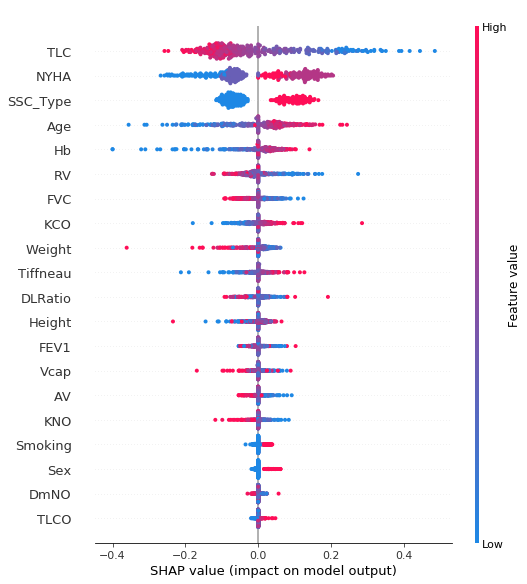

In [109]:
shap.summary_plot(shap_values_test, X)

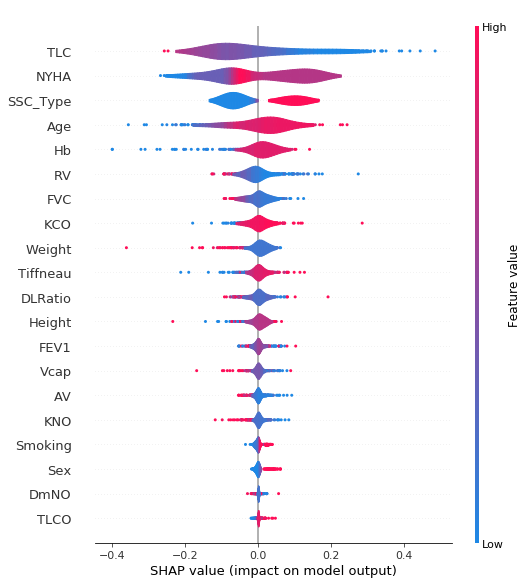

In [110]:
shap.summary_plot(shap_values_test, X,plot_type="violin")

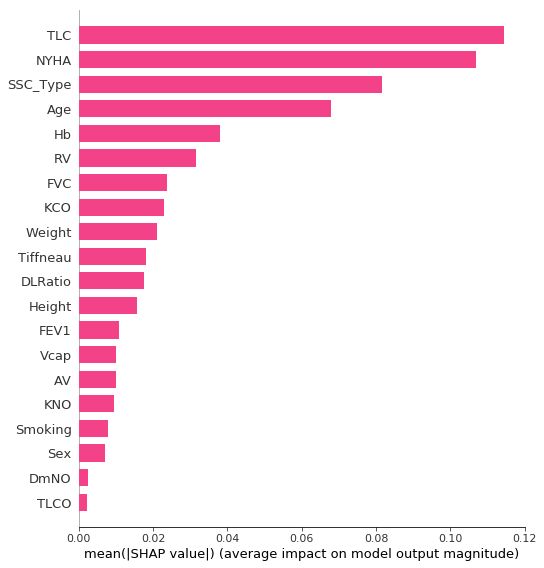

In [111]:
shap.summary_plot(shap_values_test,X,plot_type='bar',color="#f44289")

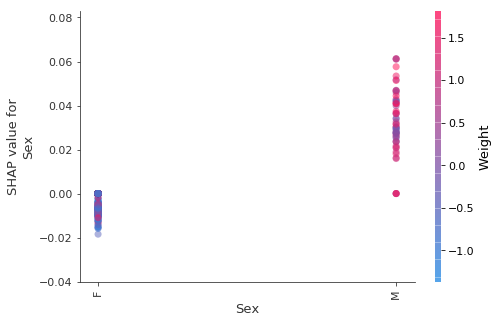

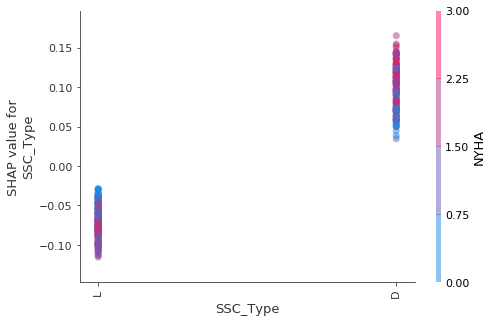

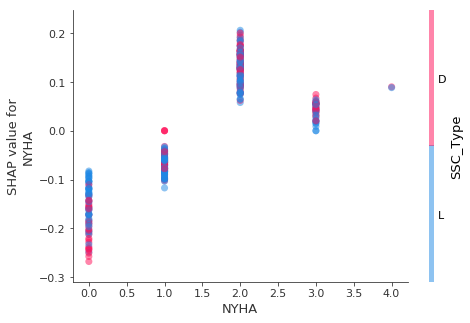

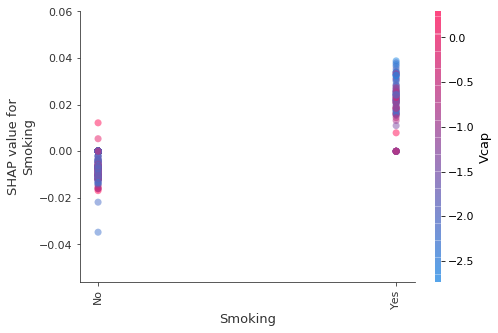

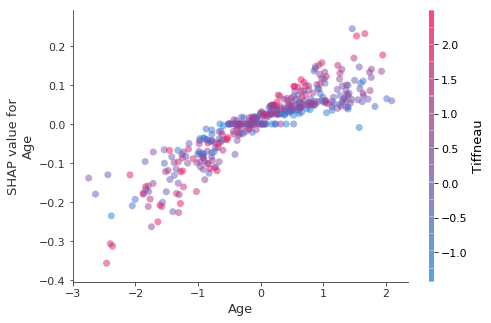

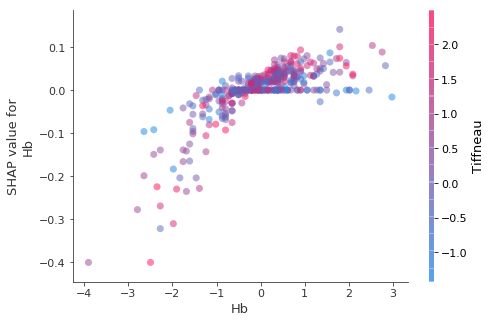

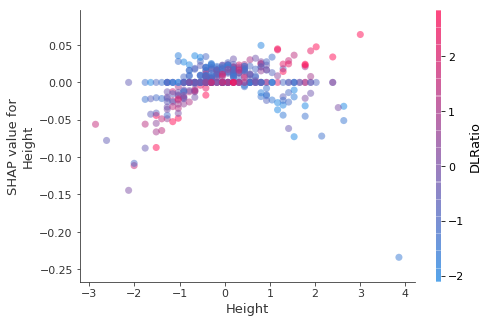

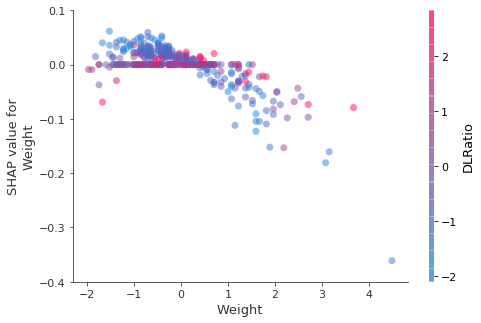

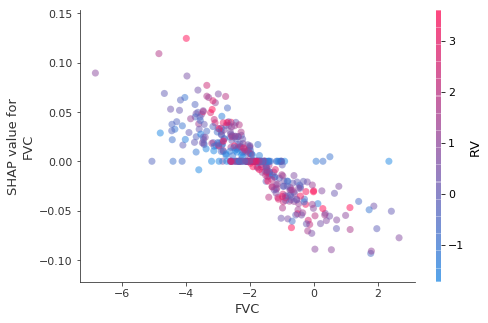

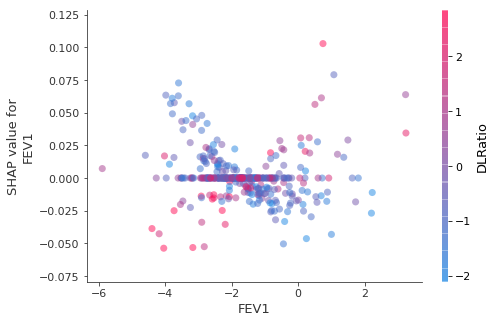

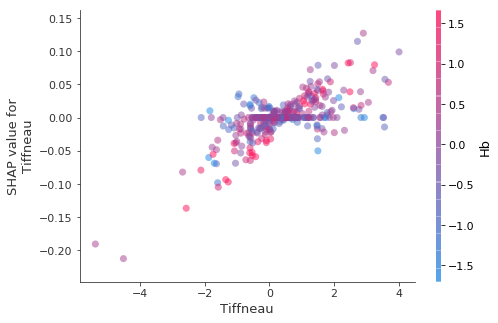

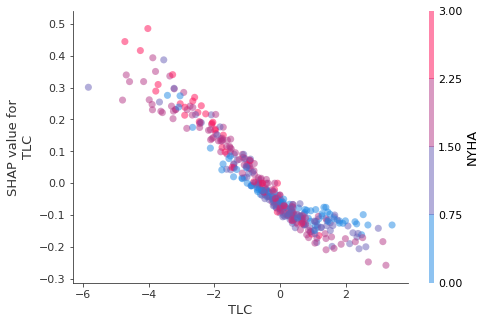

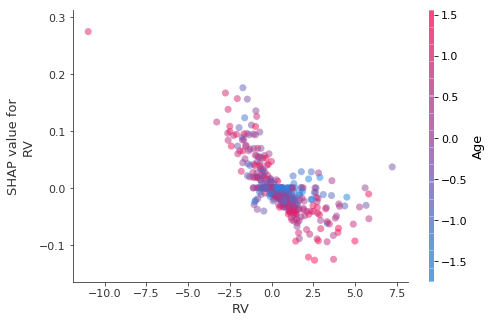

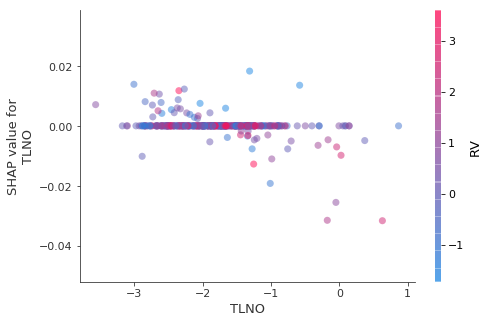

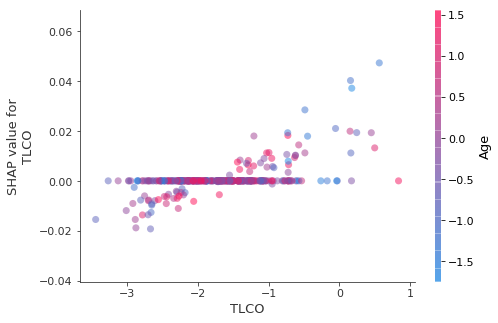

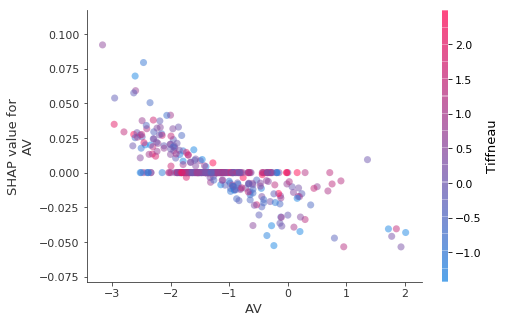

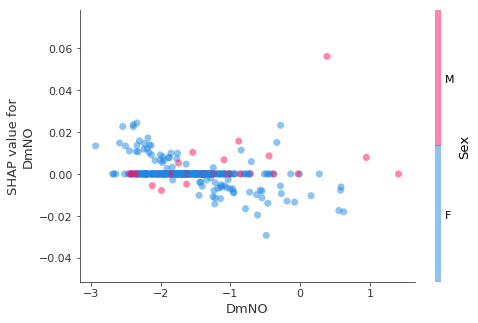

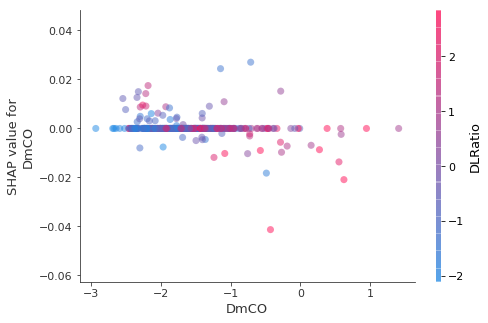

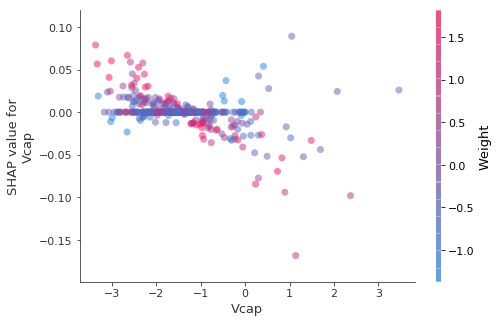

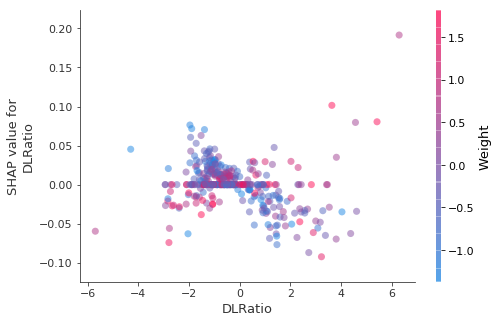

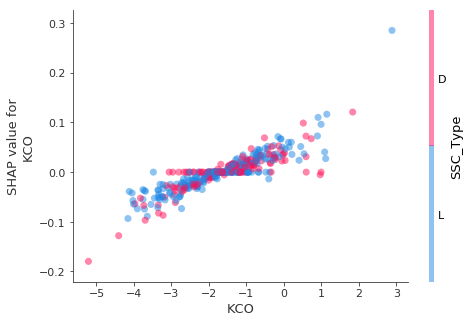

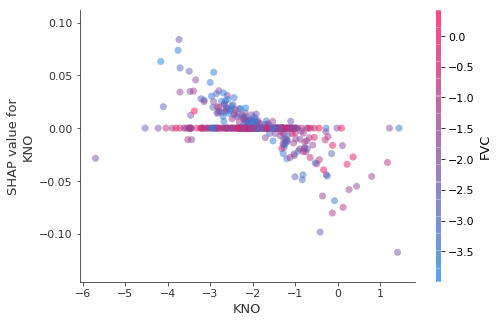

In [112]:
for name in X.columns:
    shap.dependence_plot(name, shap_values_test, 
                         X, 
                         display_features=X_disp,
                         dot_size=50,alpha=0.5,
                        )